In [79]:
import pandas as pd
from pyrosm import OSM
from pyrosm import get_data
from pyrosm.data import sources
from IPython.display import Image
pd.set_option('display.max_columns', 40)

In [67]:
osm = OSM(get_data('test_pbf'))

In [68]:
# Read nodes and edges of the 'driving' network
nodes, edges = osm.get_network(nodes=True, network_type="driving")
G = osm.to_graph(nodes,edges,direction='oneway')

In [69]:
edges.head(5)

,access,bridge,highway,int_ref,lanes,lit,maxspeed,name,oneway,ref,service,surface,id,timestamp,version,tags,osm_type,geometry,u,v,length
0,None,None,secondary,None,2,None,80,Hurukselantie,None,357,None,asphalt,4732994,1441800394,23,"{""name:fi"":""Hurukselantie""}",way,"LINESTRING (26.94310 60.52580, 26.94295 60.52596)",36156596,2316826913,20.096
1,None,None,secondary,None,2,None,80,Hurukselantie,None,357,None,asphalt,4732994,1441800394,23,"{""name:fi"":""Hurukselantie""}",way,"LINESTRING (26.94295 60.52596, 26.94261 60.52639)",2316826913,3735963133,51.356
2,None,None,secondary,None,2,None,80,Hurukselantie,None,357,None,asphalt,4732994,1441800394,23,"{""name:fi"":""Hurukselantie""}",way,"LINESTRING (26.94261 60.52639, 26.94132 60.52804)",3735963133,277446336,196.370
3,None,None,secondary,None,2,None,80,Hurukselantie,None,357,None,asphalt,4732994,1441800394,23,"{""name:fi"":""Hurukselantie""}",way,"LINESTRING (26.94132 60.52804, 26.94108 60.52835)",277446336,3730253796,36.410
4,None,None,secondary,None,2,None,80,Hurukselantie,None,357,None,asphalt,4732994,1441800394,23,"{""name:fi"":""Hurukselantie""}",way,"LINESTRING (26.94108 60.52835, 26.93975 60.52998)",3730253796,277446337,195.452


In [70]:
nodes.head()

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,26.943103,60.525798,None,1369300078,4,0,36156596,POINT (26.94310 60.52580)
1,26.942948,60.525962,{'highway': 'crossing'},1369300072,1,0,2316826913,POINT (26.94295 60.52596)
2,26.942611,60.526393,None,1441800372,1,0,3735963133,POINT (26.94261 60.52639)
3,26.941323,60.528041,None,1282588818,4,0,277446336,POINT (26.94132 60.52804)
4,26.941076,60.528345,None,1441438154,1,0,3730253796,POINT (26.94108 60.52835)


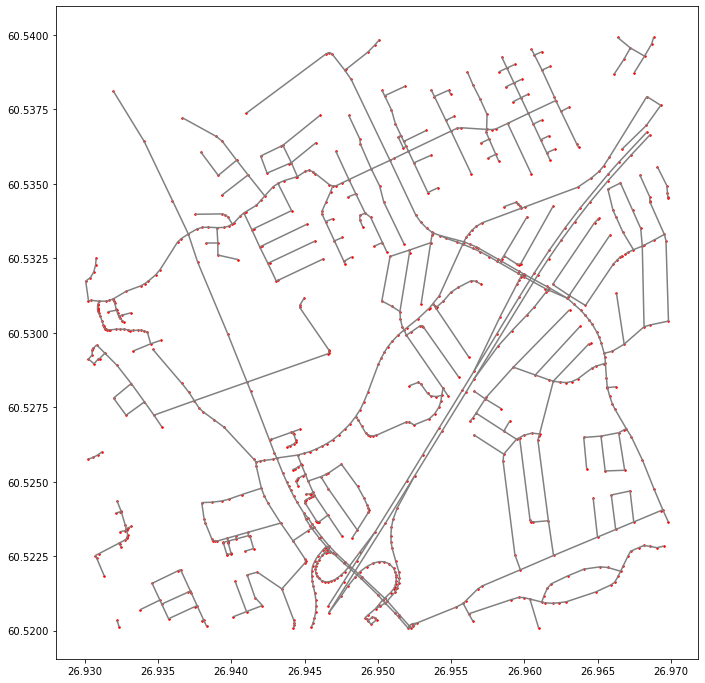

In [71]:
ax = edges.plot(figsize=(12,12), color="gray")
ax = nodes.plot(ax=ax, color="red", markersize=2.5)

In [72]:
nodes.shape

(892, 8)

In [73]:
edges.shape

(932, 21)

## create template for network.xml

In [74]:
node_ID_list=nodes['id']
node_lat_list=nodes['lat']
node_lon_list=nodes['lon']
edge_ID_list=edges['id']
edge_from_list=edges['u']
edge_to_list=edges['v']
edge_length_list=edges['length']

In [75]:
with open("template_network.xml",'w') as f:
    f.write('<?xml version="1.0" encoding="utf-8"?>\n')
    f.write('<!DOCTYPE network SYSTEM "http://www.matsim.org/files/dtd/network_v1.dtd">\n')
    f.write('<network name="equil test network">\n')
    f.write('\t<nodes>\n')
    for ID,lat,lon in zip(node_ID_list,node_lat_list,node_lon_list):
        x,y = cartesian3(lat,lon)
        f.write(f'<node id="{ID}" x="{lon}" y="{lat}"/>\n')
    f.write('\t</nodes>\n')
    f.write('\t<links>\n')
    for ID,u,v,l in zip(edge_ID_list,edge_from_list,edge_to_list,edge_length_list):
        f.write(f'\t<link id="{ID}" from="{u}" to="{v}" length="{l}" capacity="36000" freespeed="27.78" permlanes="1"/>\n')
    f.write('\t</links>\n')
    f.write('</network>')
    

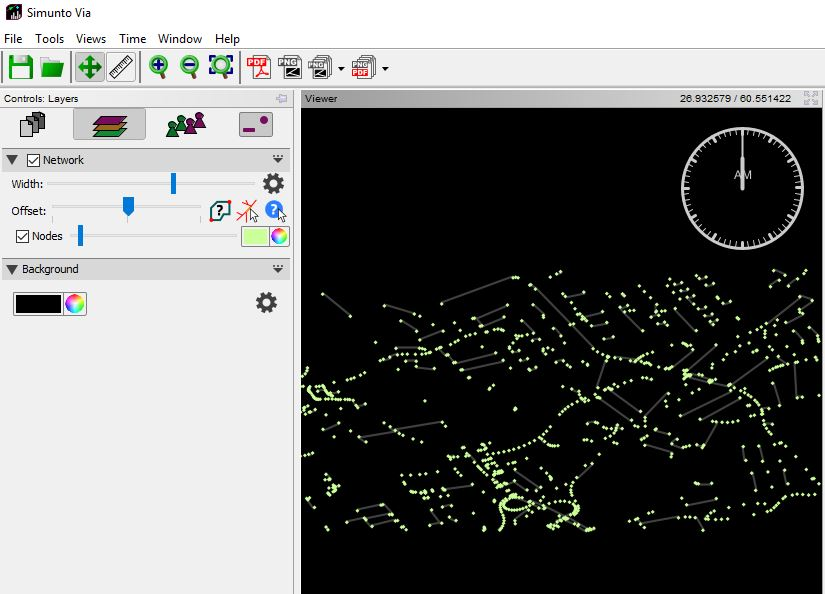

In [80]:
Image("C:/Users/Zhiyan/Desktop/via_sc.jpg")

### potential issues:
    1. current graph is bi-directional. Need to be transformmed to uni-directional
    2. capacity and freespeed and permlanes should be set. Not sure if they are avail in OSM data. Need to explore further
    3. coordinate system transformation